# Part I - (Loan Data from Prosper)
## by (Damilare Ayoola)

## Introduction
> This is a Loan Data from Prosper. It contains 113,937 loans with 81 variables on each loan, including loan amount, interest rate, current loan status, borrower income, and many others.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in dataset and print basic information

In [2]:
prosperLoan = pd.read_csv('prosperLoanData.csv')
print(prosperLoan.shape)
print(prosperLoan.dtypes)
prosperLoan.head()

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### The Structure of the dataset

> 113937 Rows, 81 Columns

### The main feature(s) of interest in the dataset

> Term, LoanStatus, BorrowerRate, ProsperScore, EmploymentStatus, CreditScoreRangeLower, CreditScoreRangeUpper, IncomeRange, TotalProsperLoans, LoanOriginalAmount, LoanOriginationDate, MonthlyLoanPayment

### The dataset I think will help support your investigation into your feature(s) of interest

> LoanOriginalAmount, LoanStatus, LoanOriginationDAte, EmploymentStatus, IncomeRange, & Term

In [3]:
#Reduce the dataset to the ones needed for this project
prosperLoan = prosperLoan[['Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'ProsperScore', 'EmploymentStatus', 
         'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'IncomeRange', 'TotalProsperLoans', 'LoanOriginalAmount', 
         'LoanOriginationDate', 'MonthlyLoanPayment']]

In [4]:
print(prosperLoan.shape)
print(prosperLoan.dtypes)
#prosperLoan.head()

(113937, 13)
Term                       int64
LoanStatus                object
BorrowerAPR              float64
BorrowerRate             float64
ProsperScore             float64
EmploymentStatus          object
CreditScoreRangeLower    float64
CreditScoreRangeUpper    float64
IncomeRange               object
TotalProsperLoans        float64
LoanOriginalAmount         int64
LoanOriginationDate       object
MonthlyLoanPayment       float64
dtype: object


### What is the structure of the new dataset?

> 113937 Rows, 13 Columns

In [5]:
# descriptive statistics for numeric variables
prosperLoan.describe()

,Term,BorrowerAPR,BorrowerRate,ProsperScore,CreditScoreRangeLower,CreditScoreRangeUpper,TotalProsperLoans,LoanOriginalAmount,MonthlyLoanPayment
count,113937.000000,113912.000000,113937.000000,84853.000000,113346.000000,113346.000000,22085.000000,113937.00000,113937.000000
mean,40.830248,0.218828,0.192764,5.950067,685.567731,704.567731,1.421100,8337.01385,272.475783
std,10.436212,0.080364,0.074818,2.376501,66.458275,66.458275,0.764042,6245.80058,192.697812
min,12.000000,0.006530,0.000000,1.000000,0.000000,19.000000,0.000000,1000.00000,0.000000
25%,36.000000,0.156290,0.134000,4.000000,660.000000,679.000000,1.000000,4000.00000,131.620000
50%,36.000000,0.209760,0.184000,6.000000,680.000000,699.000000,1.000000,6500.00000,217.740000
75%,36.000000,0.283810,0.250000,8.000000,720.000000,739.000000,2.000000,12000.00000,371.580000
max,60.000000,0.512290,0.497500,11.000000,880.000000,899.000000,8.000000,35000.00000,2251.510000


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


In [6]:
# Convert IncomeRange to ordinal categorical 
ordinal_var_dict = {'IncomeRange':['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+'],
                   'EmploymentStatus': ['Employed','Self-employed','Full-time','Part-time','Retired','Not employed',]
                   }
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    prosperLoan[var] = prosperLoan[var].astype(ordered_var)

In [7]:
prosperLoan.LoanOriginalAmount.value_counts()

4000     14333
15000    12407
10000    11106
5000      6990
2000      6067
         ...  
5284         1
7936         1
1201         1
10593        1
4292         1
Name: LoanOriginalAmount, Length: 2468, dtype: int64

#### I'll start by looking at the distribution of the main variable of interest: LoanOriginalAmount.

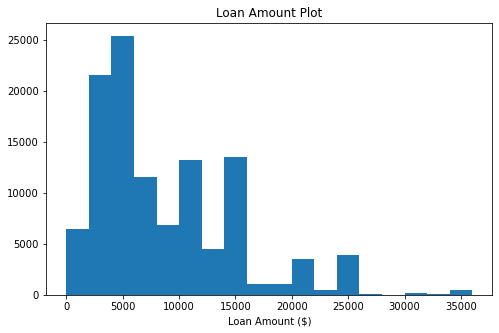

In [8]:
#univarite plot of LoanOriginalAmount
binsize = 2000
bin = np.arange(0, prosperLoan.LoanOriginalAmount.max()+binsize, binsize)

plt.figure(figsize=[8,5])
plt.hist(data=prosperLoan,x ='LoanOriginalAmount', bins = bin)
plt.title('Loan Amount Plot')
plt.xlabel('Loan Amount ($)')
plt.show()

#### Observation: The Loan Amount is right skewed. 
I'll put it on a log scale to balance it

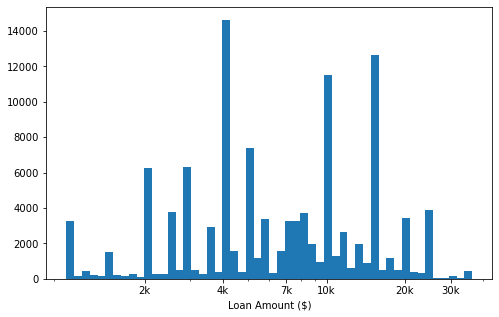

In [9]:
# there's a long tail in the distribution, and the the distribution is right skewed so let's put it on a log scale instead
log_binsize = 0.03
bins = 10 ** np.arange(3, np.log10(prosperLoan.LoanOriginalAmount.max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = prosperLoan, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([2e3, 4e3, 7e3, 1e4, 2e4, 3e4], ['2k', '4k', '7k', '10k', '20k', '30k'])
#plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Loan Amount ($)')
plt.show()

**There's a long tail at 4k level.**

#### check for the Loan Term with the highest

In [10]:
#univarite plot of Loan Term
prosperLoan.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

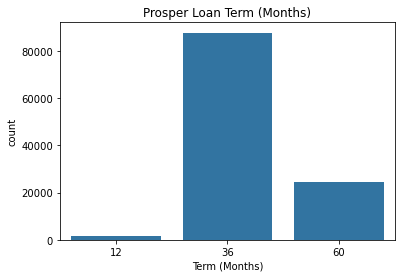

In [52]:
base_color = sb.color_palette()[0]
sb.countplot(data=prosperLoan, x='Term', color=base_color)
plt.title('Prosper Loan Term (Months)')
plt.xlabel('Term (Months)');

#### Observation: There are 3 loan terms, 12, 36, 60. The highest loan term taken is 36 Months

#### Check for the year with the highest number of loan

In [12]:
#check for the dtype of LoanOriginationDAte
prosperLoan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Term                   113937 non-null  int64   
 1   LoanStatus             113937 non-null  object  
 2   BorrowerAPR            113912 non-null  float64 
 3   BorrowerRate           113937 non-null  float64 
 4   ProsperScore           84853 non-null   float64 
 5   EmploymentStatus       102529 non-null  category
 6   CreditScoreRangeLower  113346 non-null  float64 
 7   CreditScoreRangeUpper  113346 non-null  float64 
 8   IncomeRange            105390 non-null  category
 9   TotalProsperLoans      22085 non-null   float64 
 10  LoanOriginalAmount     113937 non-null  int64   
 11  LoanOriginationDate    113937 non-null  object  
 12  MonthlyLoanPayment     113937 non-null  float64 
dtypes: category(2), float64(7), int64(2), object(2)
memory usage: 9.8+ MB


In [13]:
#convert Loan Origination Date to datetime type
prosperLoan['LoanOriginationDate'] = pd.to_datetime(prosperLoan['LoanOriginationDate'])

In [14]:
#Extract Year from LoanOriginationDate and put it in a new column 'LOanOriginationYear'
prosperLoan['LoanOriginationYear'] = prosperLoan['LoanOriginationDate'].apply(lambda x: x.year)

In [15]:
#confirm if the LoanOriginationYear has been created
prosperLoan.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperScore,EmploymentStatus,CreditScoreRangeLower,CreditScoreRangeUpper,IncomeRange,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,LoanOriginationYear
0,36,Completed,0.16516,0.1580,NaN,Self-employed,640.0,659.0,"$25,000-49,999",NaN,9425,2007-09-12,330.43,2007
1,36,Current,0.12016,0.0920,7.0,Employed,680.0,699.0,"$50,000-74,999",NaN,10000,2014-03-03,318.93,2014
2,36,Completed,0.28269,0.2750,NaN,NaN,480.0,499.0,NaN,NaN,3001,2007-01-17,123.32,2007
3,36,Current,0.12528,0.0974,9.0,Employed,800.0,819.0,"$25,000-49,999",NaN,10000,2012-11-01,321.45,2012
4,36,Current,0.24614,0.2085,4.0,Employed,680.0,699.0,"$100,000+",1.0,15000,2013-09-20,563.97,2013


The new column has been created

In [16]:
#view the value counts of LoanOriginationYear
prosperLoan.LoanOriginationYear.value_counts()

2013    34345
2012    19553
2014    12172
2008    11552
2007    11460
2011    11228
2006     5906
2010     5652
2009     2047
2005       22
Name: LoanOriginationYear, dtype: int64

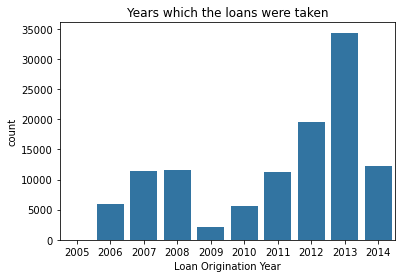

In [17]:
#Visualize the Year 
base_color = sb.color_palette()[0]
sb.countplot(data=prosperLoan, x='LoanOriginationYear', color=base_color)
plt.title('Years which the loans were taken')
plt.xlabel('Loan Origination Year');

#### Observation: The Month with the highest Loan number is 2013.
From 2009 to 2013, there was a consistent growth, but in 2014, there was a drastic drop.

Let's check how many people have completed their loans. This could be the reason for the drop in the 2014.

In [18]:
y_2013 = prosperLoan[prosperLoan['LoanOriginationYear'] == 2013]

In [19]:
#y_2013 = pd.DataFrame(y_2013)

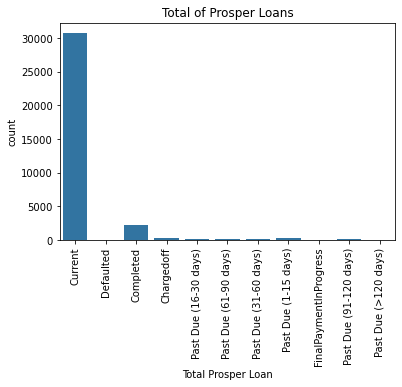

In [20]:
#Visualize the TotalProsperLoans
base_color = sb.color_palette()[0]
sb.countplot(data=y_2013, x='LoanStatus', color=base_color)
plt.title('Total of Prosper Loans')
plt.xticks(rotation=90)
plt.xlabel('Total Prosper Loan');

#### Higher percentage of those who took loan in 2013 are still paying up their loans

**I want to check for the reason why they're still paying up their loans. Probably they signed up for 36 or 60 months Term**

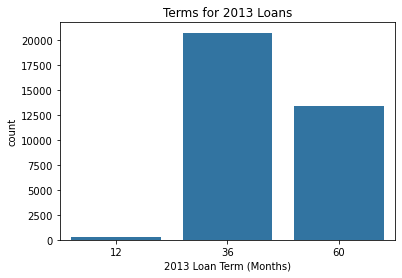

In [55]:
#Visualize the TotalProsperLoans
base_color = sb.color_palette()[0]
sb.countplot(data=y_2013, x='Term', color=base_color)
plt.title('Terms for 2013 Loans')
plt.xlabel('2013 Loan Term (Months)');

#### I was actually right. Most of them signed up for 36 and 60 Month Term. which means they have 3 - 5 years to recover all their loans.

#### Check for the Total Prosper Loan with the highest number

In [21]:
#view the value counts of TotalProsperLoans
prosperLoan.TotalProsperLoans.value_counts()

1.0    15538
2.0     4540
3.0     1447
4.0      417
5.0      104
6.0       29
7.0        8
8.0        1
0.0        1
Name: TotalProsperLoans, dtype: int64

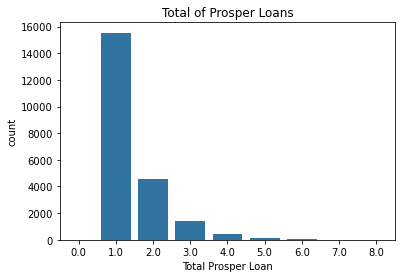

In [22]:
#Visualize the TotalProsperLoans
base_color = sb.color_palette()[0]
sb.countplot(data=prosperLoan, x='TotalProsperLoans', color=base_color)
plt.title('Total of Prosper Loans')
plt.xlabel('Total Prosper Loan');

#### Observation: 1 has the highest.  
**This shows that most of those that took loans have taken loans once before**

In [23]:
#view the value counts of TotalProsperLoans
prosperLoan.ProsperScore.value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

Text(0.5, 0, 'Prosper Scores')

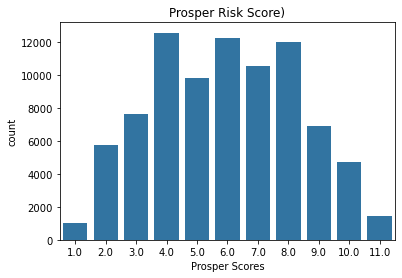

In [24]:
#Visualize the ProsperScore
base_color = sb.color_palette()[0]
sb.countplot(data=prosperLoan, x='ProsperScore', color=base_color)
plt.title('Prosper Risk Score)')
plt.xlabel('Prosper Scores')

**Prosper took a balance risk. There's no skewness**

In [25]:
prosperLoan.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

Text(0, 0.5, 'Loan Status')

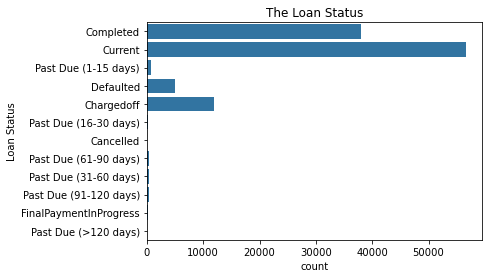

In [26]:
base_color = sb.color_palette()[0]
sb.countplot(data=prosperLoan, y='LoanStatus', color=base_color)
plt.title("The Loan Status")
plt.ylabel("Loan Status")
#plt.xticks(rotation=25);

#### Most people are still servicing their loan, and we also have high reasonable percentage of people that have completed their loans.

#### What is the highest Employment Status that Prosper offer loan?

In [27]:
prosperLoan.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

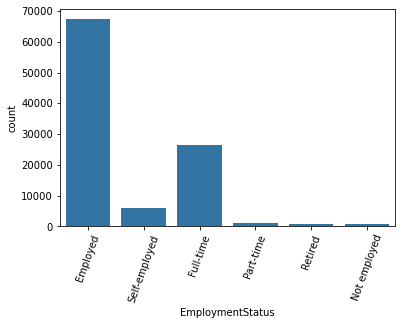

In [28]:
base_color = sb.color_palette()[0]
sb.countplot(data=prosperLoan, x='EmploymentStatus', color=base_color);
plt.xticks(rotation=70);

#### `Observation`: Most of the people that took or that were granted prosper loan were Employed, then Full-time.

The plot shows that if you work part-time, or retired, or not employed, the possibility of getting loan from Prosper is almost impossible.

#### What is the highest Income range that Prosper offerred loan?

In [29]:
prosperLoan.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
$1-24,999          7274
$0                  621
Name: IncomeRange, dtype: int64

Text(0.5, 0, 'Income Range')

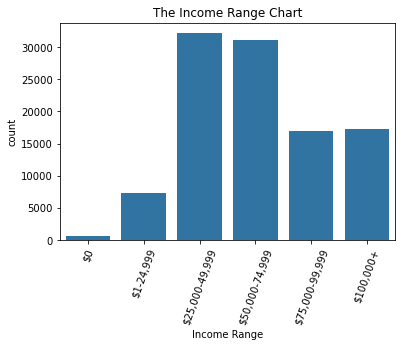

In [30]:
base_color = sb.color_palette()[0]
sb.countplot(data=prosperLoan, x='IncomeRange', color=base_color);
plt.xticks(rotation=70);
plt.title('The Income Range Chart')
plt.xlabel('Income Range')

#### `Observation`:The highest incomes range that got more loans are `$25,000-49,999` and `$50,000-74,999`.
**This means, Income range is one of the main critaria in securing loan with Prosper**

In [31]:
prosperLoan.BorrowerRate.value_counts()

0.3177    3672
0.3500    1905
0.3199    1651
0.2900    1508
0.2699    1319
          ... 
0.2201       1
0.0752       1
0.1416       1
0.2812       1
0.0739       1
Name: BorrowerRate, Length: 2294, dtype: int64

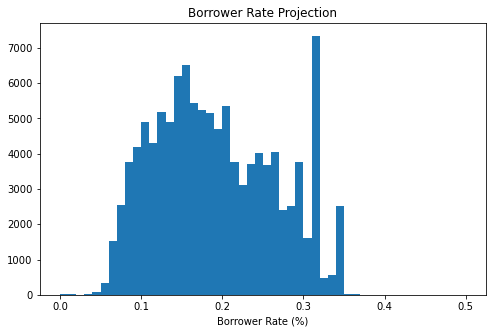

In [32]:
binsize = 0.01
bin = np.arange(0, prosperLoan.BorrowerRate.max()+binsize, binsize)

plt.figure(figsize=[8,5])
plt.hist(data=prosperLoan,x ='BorrowerRate', bins = bin)
plt.title('Borrower Rate Projection')
plt.xlabel('Borrower Rate (%)')
plt.show()

#### `Observation`: There's a long-tailed distribution within 0.3 and 0.32

### Extra Cleaning

> I created a new column for LoanOriginationYear because I needed to analyse the year with higher loan!
> I also change it's datatype

## Bivariate Visualization
To start off with, I want to look at the pairwise correlations present between features in the data.

In [33]:
numeric_vars = ['Term', 'BorrowerAPR', 'BorrowerRate', 'ProsperScore', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 
                'LoanOriginalAmount', 'MonthlyLoanPayment']
categoric_vars = ['LoanStatus', 'BorrowerState', 'EmploymentStatus', 'IncomeRange']

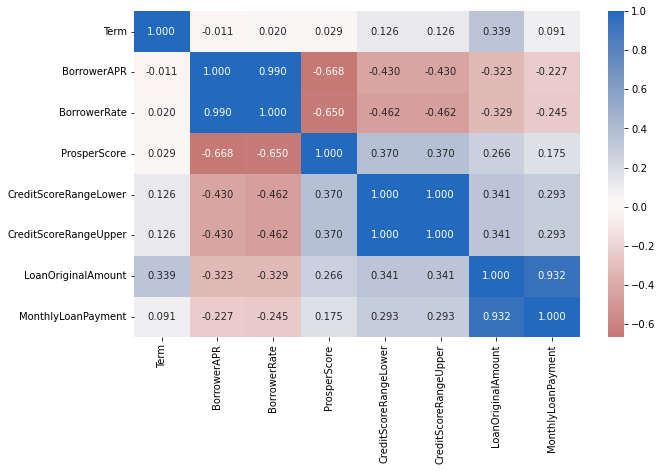

In [34]:
# correlation plot
plt.figure(figsize = [10, 6])
sb.heatmap(prosperLoan[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

##### There's a strong correlation between 
- LoanOriginalAmount & MonthlyRepayment
- CreditScoreRangeLower & CreditScoreRangeUpper

##### There's a little correlation between
- ProsperScore & CreditScoreRangeLower/Upper
- LoanOriginalAmount & Term

#### I'll Check further the relationship between LoanOriginalAmount and MonthlyLoanPayment

Text(0.5, 0, 'Original Loan Amount')

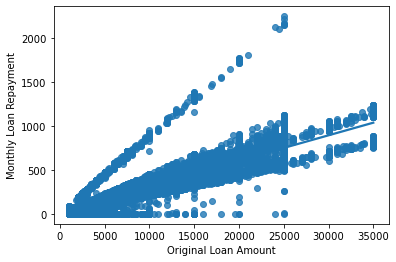

In [35]:
sb.regplot(data=prosperLoan, x = 'LoanOriginalAmount', y='MonthlyLoanPayment')
plt.ylabel("Monthly Loan Repayment")
plt.xlabel('Original Loan Amount')

#### Specifying the opaqueness of the data points. 

<AxesSubplot:xlabel='LoanOriginalAmount', ylabel='MonthlyLoanPayment'>

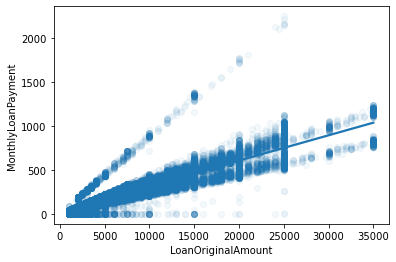

In [36]:
sb.regplot(data=prosperLoan, x = 'LoanOriginalAmount', y='MonthlyLoanPayment', scatter_kws={'alpha':1/20})

#### `Observation:` There's a positive relationship between LoanOriginalAmount and MonthlyLoanPayment
**This shows that, the higher the Loan Amount, the higher the Monthly Loan Repayment**

C:\Users\Deedoth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Deedoth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 720x720 with 0 Axes>

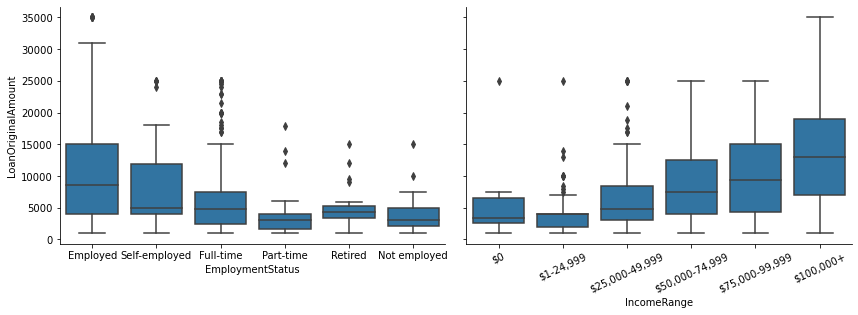

In [37]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(prosperLoan.shape[0], 2000, replace = False)
loan_samp = prosperLoan.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loan_samp, y_vars = ['LoanOriginalAmount'], x_vars = ['EmploymentStatus', 'IncomeRange'],
                height = 4, aspect = 1.5)
g.map(boxgrid)
plt.xticks(rotation=25)
plt.show();

##### There are outliers in most of the columns here
- The Amount taken Vs Employment Status shows that Employment Status is one of the very strong criteria in securing loan with Prosper. Highers Loans were given to Employed & Self Employed category. 

- The Income Range and Loan Amount also confirmed that Proper's target is people with high income range. 

#### BorrowerRate & LoanOriginationYear

C:\Users\Deedoth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 720x720 with 0 Axes>

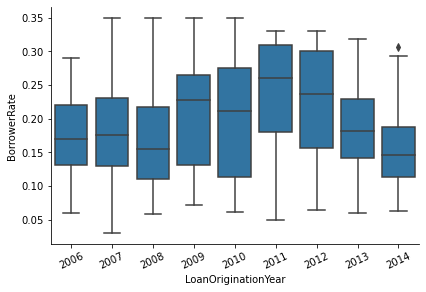

In [38]:

samples = np.random.choice(prosperLoan.shape[0], 2000, replace = False)
loan_samp = prosperLoan.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loan_samp, y_vars = ['BorrowerRate'], x_vars = 'LoanOriginationYear',
                height = 4, aspect = 1.5)
g.map(boxgrid)
plt.xticks(rotation=25)
plt.show();

### `Observations: `
In year 2011, the interest rate went higher, and after that year, the borrower rate dropped. 

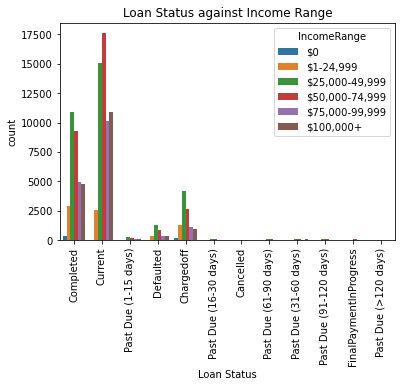

In [39]:
sb.countplot(data = prosperLoan, x = 'LoanStatus', hue = 'IncomeRange');
plt.xticks(rotation=90)
plt.title('Loan Status against Income Range')
plt.xlabel('Loan Status')
plt.show();

### `Observation: `
The income range ['$25,000 - 49,999'], and ['$50,000 - 74,999'] are the highest income range that have finished paying their loans, and they are also the highest paying currently

#### Let's check the LoanStatus against EmploymentStatus

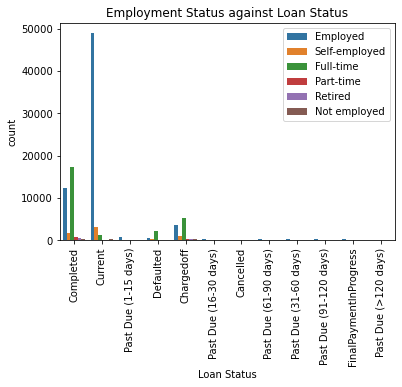

In [40]:
sb.countplot(data = prosperLoan, x = 'LoanStatus', hue = 'EmploymentStatus');
plt.xticks(rotation=90);
plt.legend(loc = "upper right")
plt.title('Employment Status against Loan Status')
plt.xlabel('Loan Status');

### `Observation: `
The highest Employement category that has paid their laon is **Full-time**. The category that are currently paying up their loan is **Employed**

#### Let's check the reason why the Employed category are the ones paying their loans

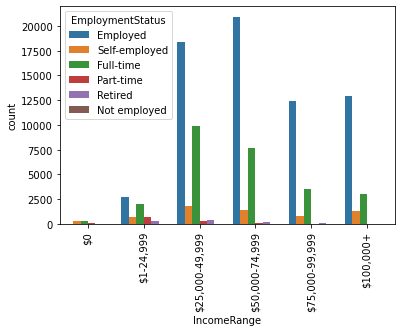

In [41]:
sb.countplot(data = prosperLoan, x = 'IncomeRange', hue = 'EmploymentStatus');
plt.xticks(rotation=90);

### `Observation: ` Employed status get higher pay as against the rest
Employed category are the highest in each Income range category. It shows that Prosper will be highely interested in people that are employed and earns from $25,000 and above.

In [42]:
prosperLoan.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperScore,EmploymentStatus,CreditScoreRangeLower,CreditScoreRangeUpper,IncomeRange,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,LoanOriginationYear
0,36,Completed,0.16516,0.1580,NaN,Self-employed,640.0,659.0,"$25,000-49,999",NaN,9425,2007-09-12,330.43,2007
1,36,Current,0.12016,0.0920,7.0,Employed,680.0,699.0,"$50,000-74,999",NaN,10000,2014-03-03,318.93,2014
2,36,Completed,0.28269,0.2750,NaN,NaN,480.0,499.0,NaN,NaN,3001,2007-01-17,123.32,2007
3,36,Current,0.12528,0.0974,9.0,Employed,800.0,819.0,"$25,000-49,999",NaN,10000,2012-11-01,321.45,2012
4,36,Current,0.24614,0.2085,4.0,Employed,680.0,699.0,"$100,000+",1.0,15000,2013-09-20,563.97,2013


## Multivariate
IncomeRange/BorrowerRate/ProsperScore

In [43]:
#sns.boxplot(x="CreditScore", y='BorrowerRate', hue='LoanStatus', data=df_historical)

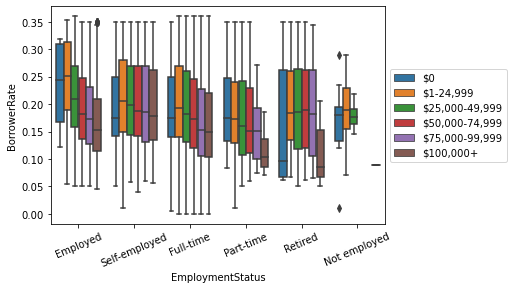

In [44]:
sb.boxplot(x="EmploymentStatus", y='BorrowerRate', hue='IncomeRange', data=prosperLoan)
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation = 23)
plt.legend(loc = "center left", bbox_to_anchor=(1., 0.5) );

### `Observation: `
- There's no `Not Employed` category that earns more than `$49,999`.

- The `$100,000+` pay lesser rate

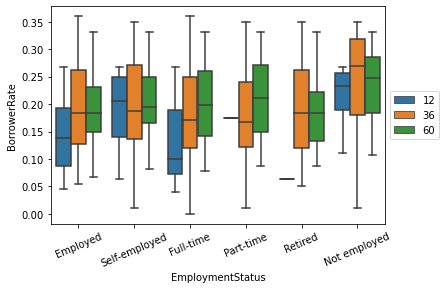

In [45]:
sb.boxplot(x="EmploymentStatus", y='BorrowerRate', hue='Term', data=prosperLoan)
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation = 23)
plt.legend(loc = "center left", bbox_to_anchor=(1., 0.5) );

### `Observation` :
Part-time and Retired category almost did not even opt for 12 month term.

## Conclusions
>- I realized that Employment Status and Income is one of the major criteria Prosper uses before loans are being granted.
>- Higher percentage of the loans were given to `Employed` and `Full-time` cathegory
>- Higher number of loans were taken in year 2013
>- There's a strong relatoinship between MonthlyLoanPayment and LoanOriginalAmount. The higher the loan taken, the higher the monthly repayment